In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from sklearn.model_selection import train_test_split,RepeatedKFold, cross_val_score,KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import model_selection

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from eli5 import explain_weights,show_weights
from yellowbrick import ROCAUC
from yellowbrick.classifier import ClassificationReport

In [6]:
print("Imported all libraries successfully")
print(os.listdir())

Imported all libraries successfully
['.config', 'VLagun_Chem_Years3.csv', 'sample_data']


In [7]:
CV_N_REPEATS=5
BINS=10

In [8]:
df = pd.read_csv("/content/VLagun_Chem_Years3.csv")
df.head()

,SRP,DOP,PP,NH4N,NO3N,DON,PN,TN/TP,Fe,SiO4Si,DINtoDIP,Years
0,3.5,11.7,185.0,0.039,0.022,0.551,0.759,6.848152,0.0121,2.3112,17.428571,0
1,4.4,17.5,111.3,0.020,0.025,0.123,1.181,10.127628,0.0136,2.1157,10.227273,0
2,3.2,22.8,103.4,0.016,0.008,0.582,0.576,9.134467,0.0368,2.2641,7.500000,0
3,4.3,22.3,92.7,0.026,0.021,0.693,0.689,11.978206,0.0172,2.2623,10.930233,0
4,11.7,30.3,73.2,0.022,0.048,0.383,1.006,12.664931,0.0237,2.2164,5.982906,0


In [9]:
print("Shape of the dataset",df.shape)

Shape of the dataset (120, 12)


In [11]:
from ydata_profiling import ProfileReport
report = ProfileReport(df, title="EDA Report")
report.to_file("eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 35.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0, 0.5, 'Years')

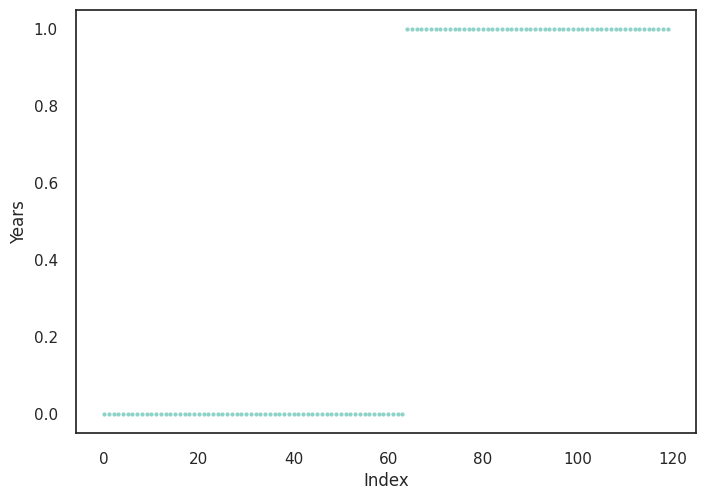

In [14]:
plt.figure()
plt.plot(df.index, df['Years'], '.')
plt.xlabel('Index')
plt.ylabel('Years')

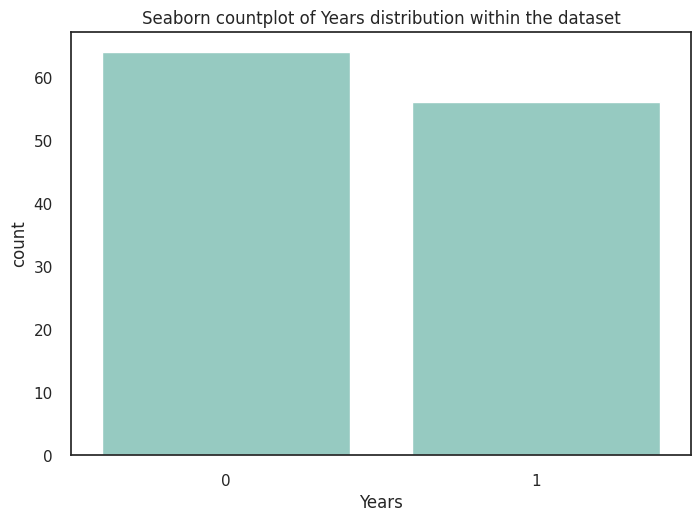

In [15]:
plt.figure()
ax = sns.countplot(data=df, x='Years');
ax.set_title("Seaborn countplot of Years distribution within the dataset");

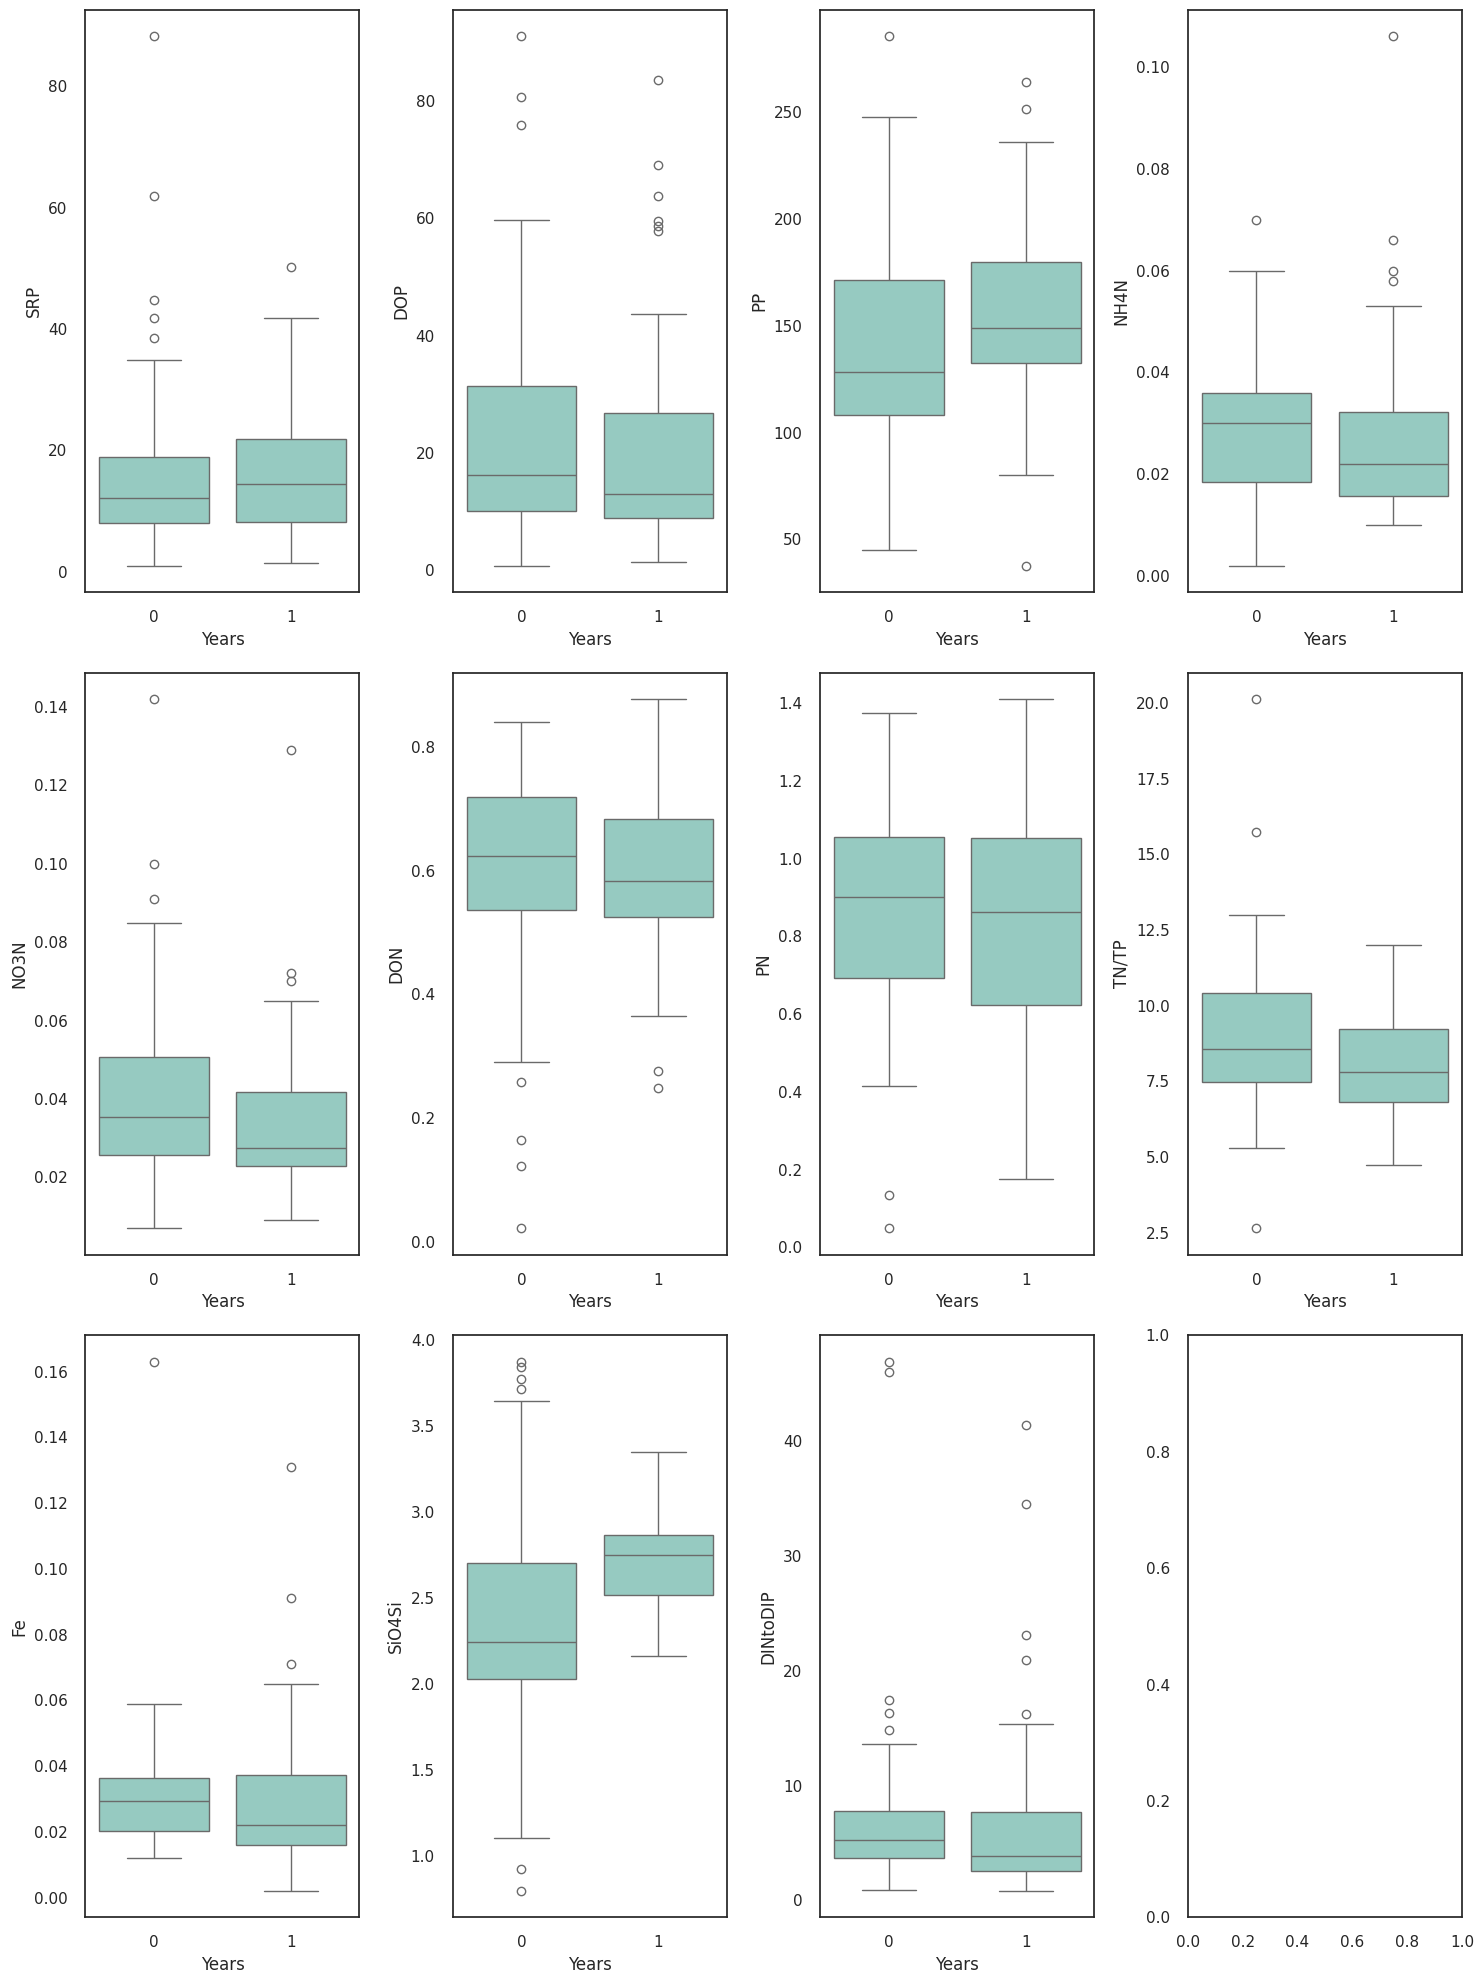

In [16]:
f, axes = plt.subplots(3, 4,figsize=(15,20))
sns.set(style="white", palette="Set3", color_codes=True)
sns.boxplot( y="SRP", x= "Years", data=df, orient='v', ax=axes[0,0])
sns.boxplot( y="DOP", x= "Years", data=df, orient='v' , ax=axes[0,1])
sns.boxplot( y="PP", x= "Years", data=df, orient='v' ,ax=axes[0,2])
sns.boxplot( y="NH4N", x= "Years", data=df, orient='v' , ax=axes[0,3])
sns.boxplot( y="NO3N", x= "Years", data=df, orient='v' , ax=axes[1,0])
sns.boxplot( y="DON", x= "Years", data=df, orient='v' , ax=axes[1,1])
sns.boxplot( y="PN", x= "Years", data=df, orient='v' , ax=axes[1,2])
sns.boxplot( y="TN/TP", x= "Years", data=df, orient='v' , ax=axes[1,3])
sns.boxplot( y="Fe", x= "Years", data=df, orient='v' , ax=axes[2,0])
sns.boxplot( y="SiO4Si", x= "Years", data=df, orient='v' , ax=axes[2,1])
sns.boxplot( y="DINtoDIP", x= "Years", data=df, orient='v' , ax=axes[2,2])

f.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                hspace=0.4, wspace=0.3)
plt.tight_layout()

In [18]:
df_copy = df.copy(deep = True)
df_copy[['SRP','DOP','PP','NH4N','NO3N','DON','PN','TN/TP','Fe','SiO4Si','DINtoDIP']] = df_copy[['SRP','DOP','PP','NH4N','NO3N','DON','PN','TN/TP','Fe','SiO4Si','DINtoDIP']].replace(0,np.nan)
print("Number of zero entries in each attribute:\n")
print(df_copy.isnull().sum())

Number of zero entries in each attribute:

SRP         0
DOP         0
PP          0
NH4N        0
NO3N        0
DON         0
PN          0
TN/TP       0
Fe          0
SiO4Si      0
DINtoDIP    0
Years       0
dtype: int64


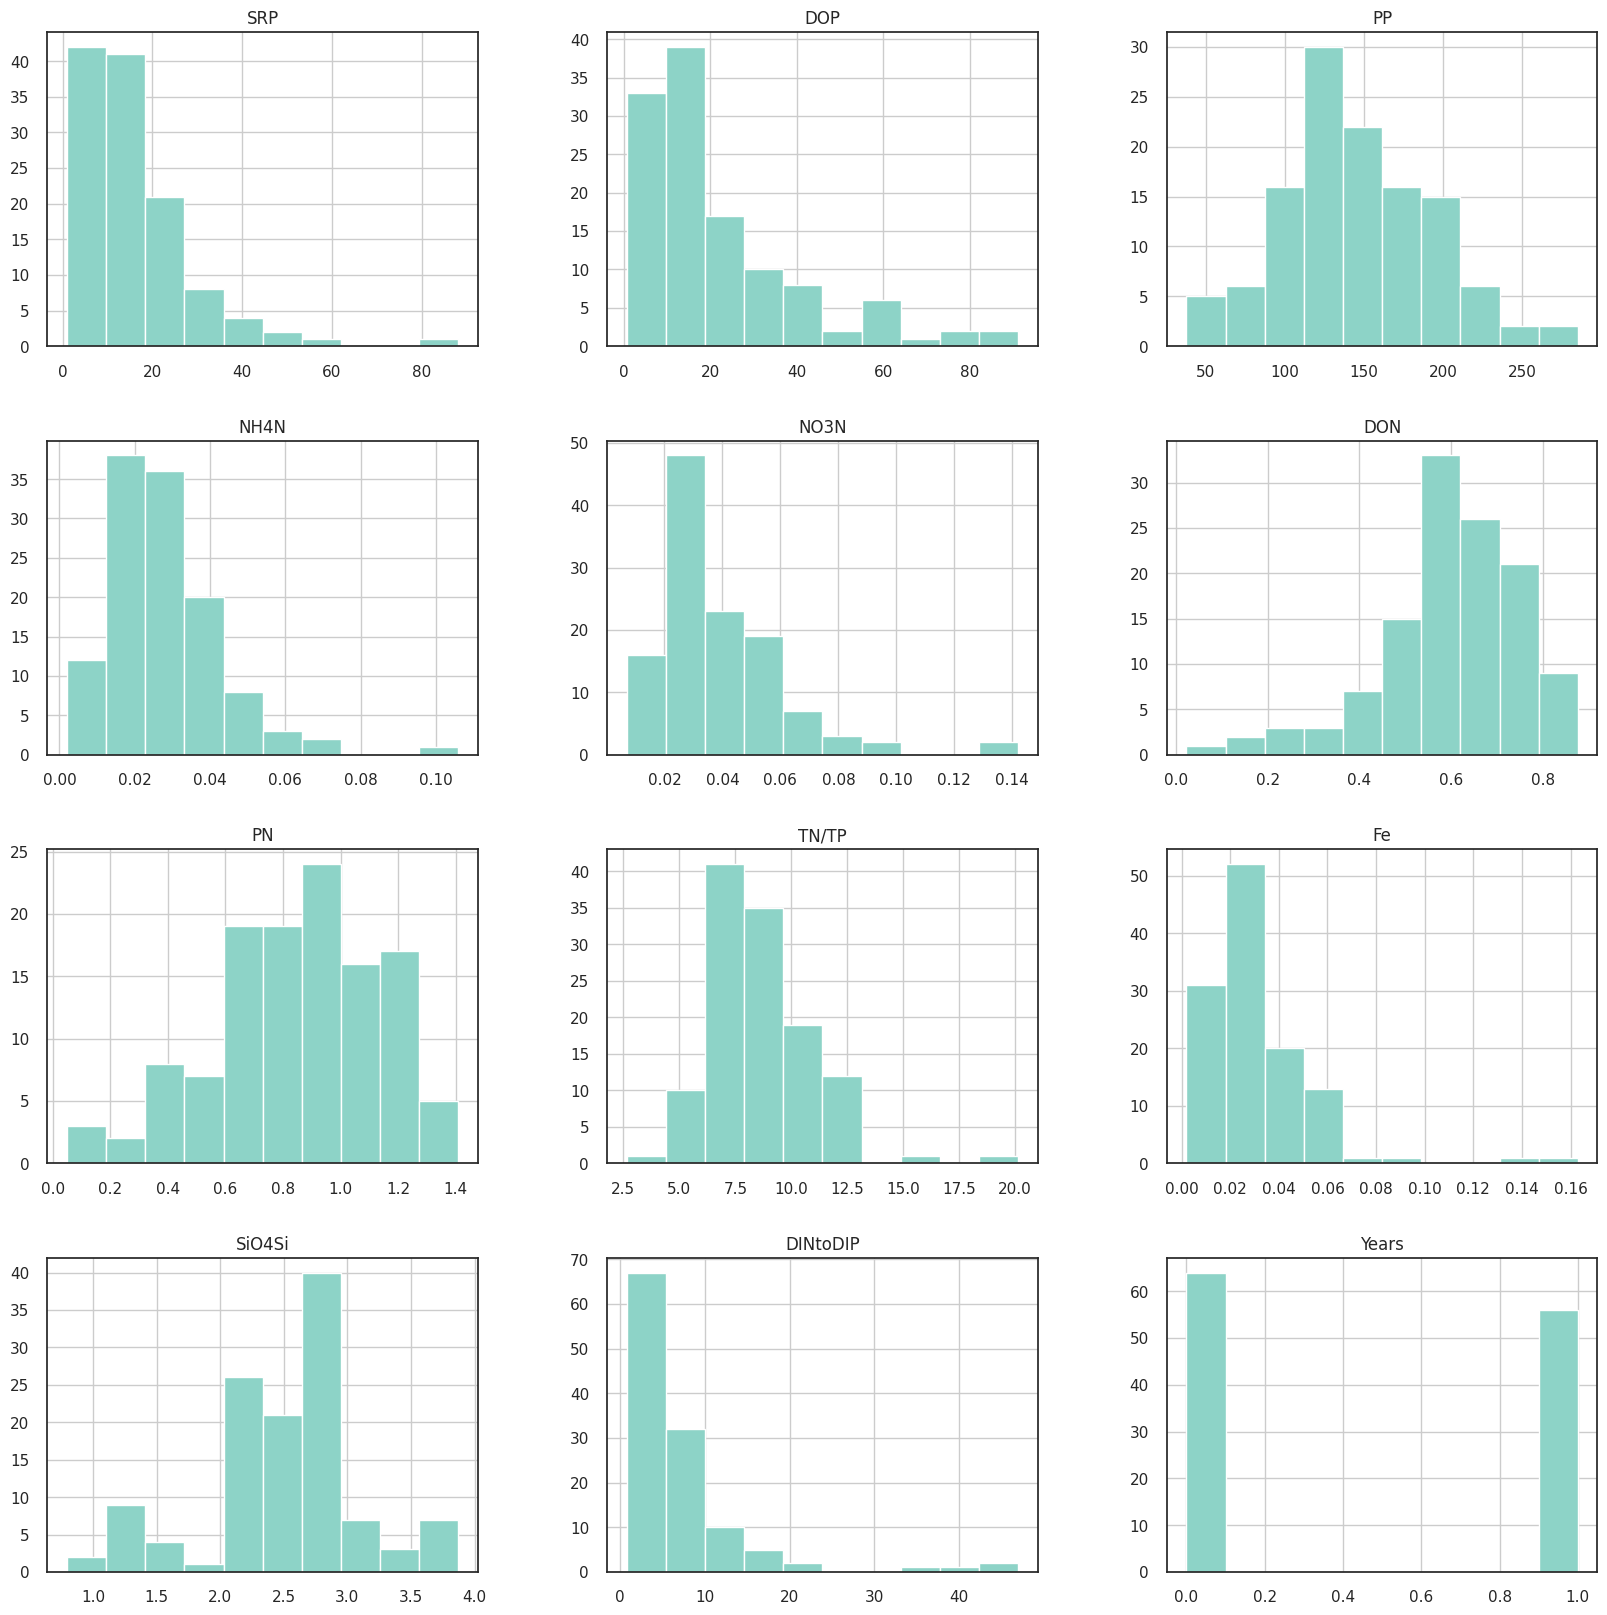

In [19]:
p = df.hist(figsize=(20,20))

In [20]:
df_copy['SRP'].fillna(df_copy['SRP'].mean(), inplace = True)
df_copy['DOP'].fillna(df_copy['DOP'].mean(), inplace = True)
df_copy['PP'].fillna(df_copy['PP'].mean(), inplace = True)
df_copy['NH4N'].fillna(df_copy['NH4N'].median(), inplace = True)
df_copy['NO3N'].fillna(df_copy['NO3N'].median(), inplace = True)
df_copy['DON'].fillna(df_copy['DON'].mean(), inplace = True)
df_copy['PN'].fillna(df_copy['PN'].mean(), inplace = True)
df_copy['TN/TP'].fillna(df_copy['TN/TP'].mean(), inplace = True)
df_copy['Fe'].fillna(df_copy['Fe'].median(), inplace = True)
df_copy['SiO4Si'].fillna(df_copy['SiO4Si'].mean(), inplace = True)
df_copy['DINtoDIP'].fillna(df_copy['DINtoDIP'].mean(), inplace = True)
print("Number of zero entries in each attribute:\n")
print(df_copy.isnull().sum())

Number of zero entries in each attribute:

SRP         0
DOP         0
PP          0
NH4N        0
NO3N        0
DON         0
PN          0
TN/TP       0
Fe          0
SiO4Si      0
DINtoDIP    0
Years       0
dtype: int64


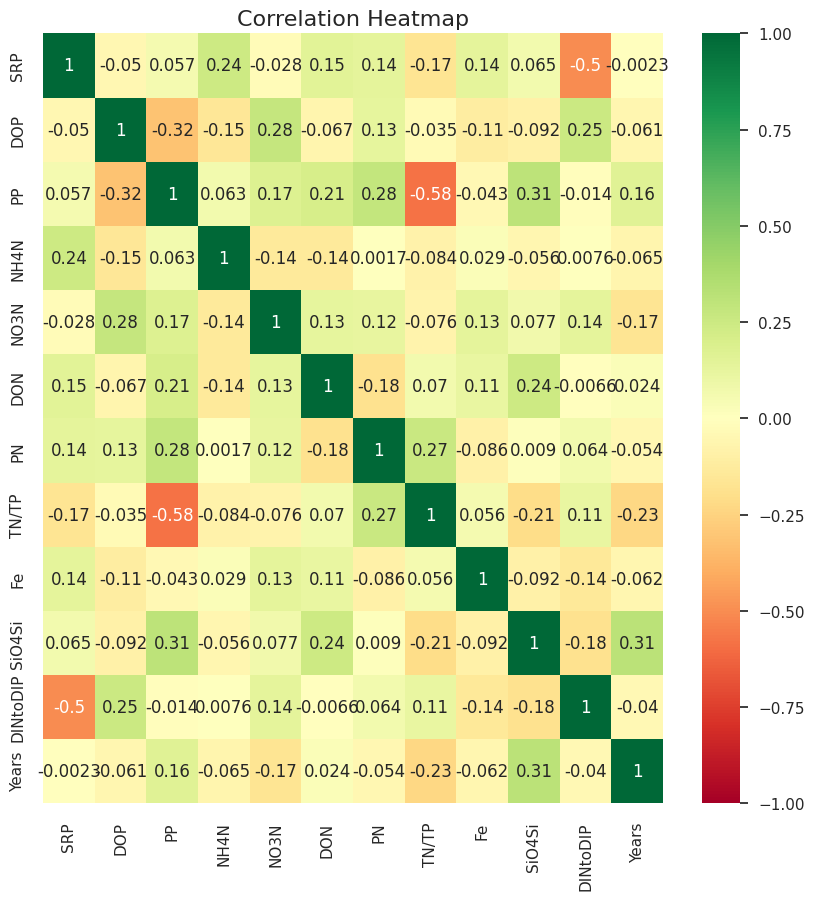

In [21]:
plt.figure(figsize=(10,10))
corr = df_copy.corr()
corr.index = df_copy.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

<Figure size 800x550 with 0 Axes>

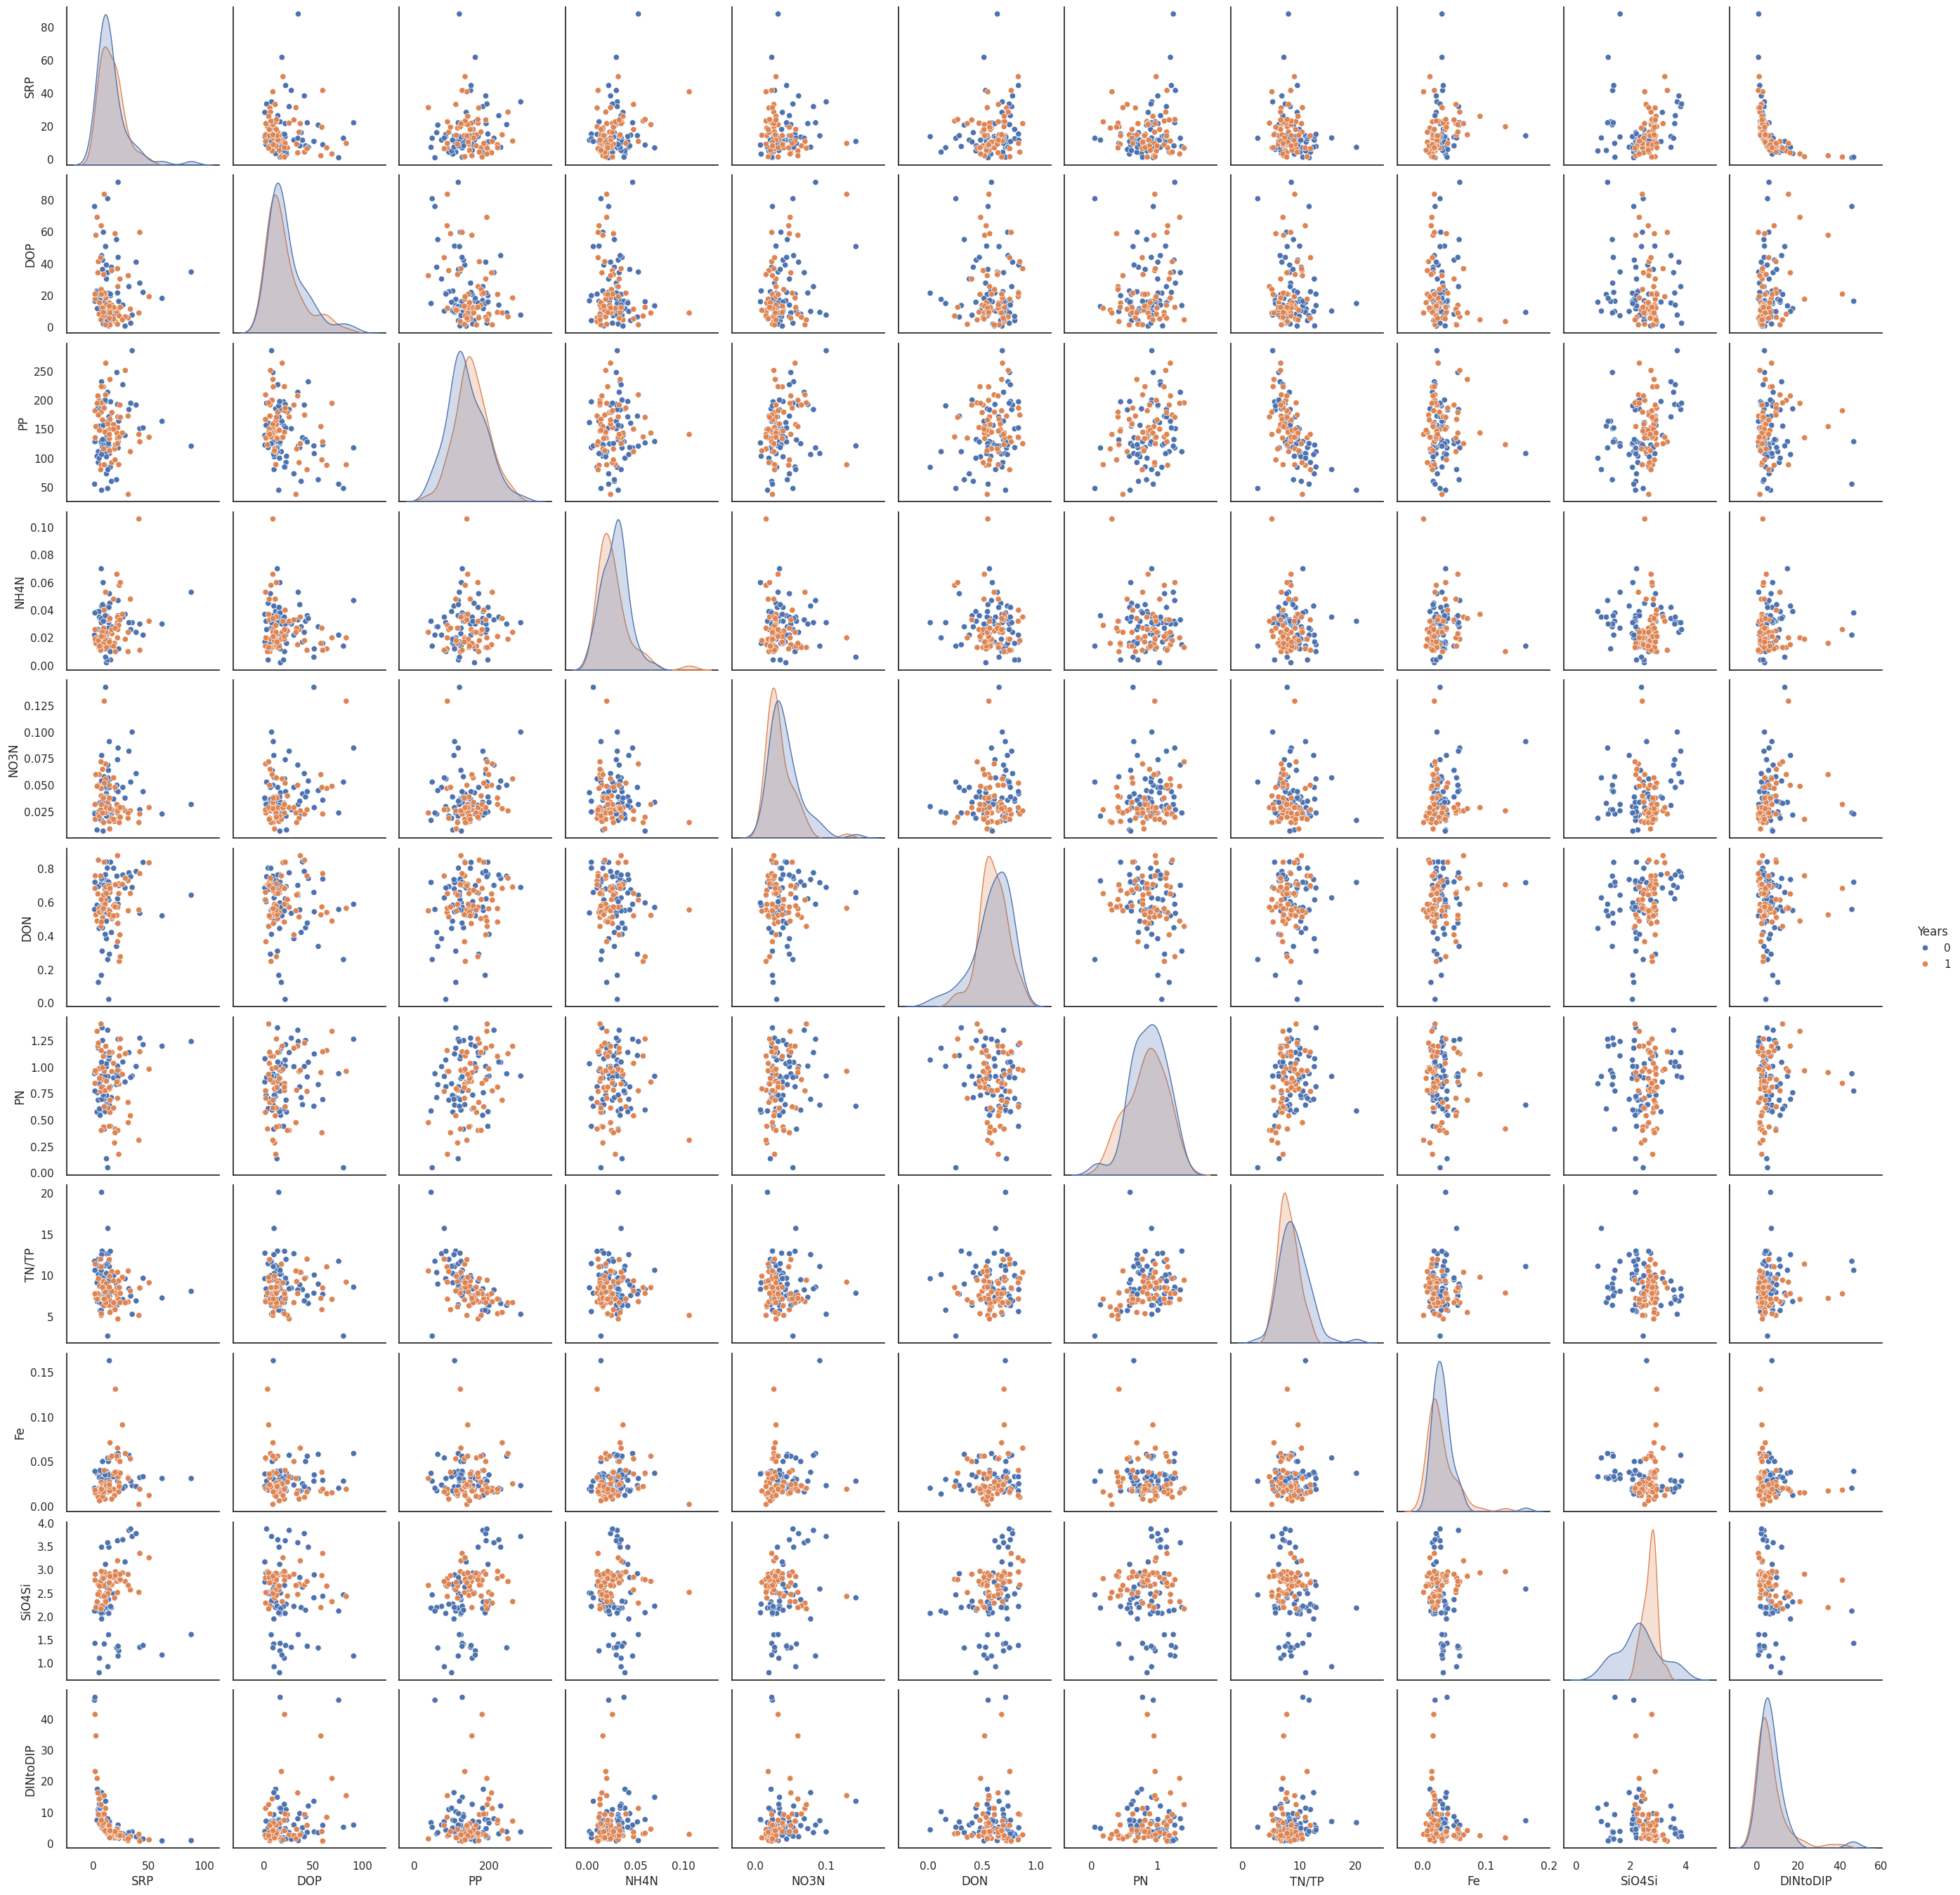

In [22]:
plt.figure()
sns.pairplot(data=df_copy,hue='Years',diag_kind='kde', palette='deep');

In [23]:
X = df_copy.iloc[:,0:11]
Y = df_copy.iloc[:,11]

X= StandardScaler().fit_transform(X)
pca=PCA(n_components=.90)
pca.fit(X)
print("Variance explained by the principal components(In decreasing order):",pca.explained_variance_ratio_)
X1=pca.transform(X)
print("Shape of transformed X:",X1.shape)

Variance explained by the principal components(In decreasing order): [0.18895058 0.1495043  0.12268902 0.11774918 0.10197341 0.09548722
 0.07926256 0.06260638]
Shape of transformed X: (120, 8)


In [28]:
df = pd.read_csv("/content/VLagun_Chem_Years3.csv")
X = df.iloc[:, 0:11].values
Y = df.iloc[:, 11].values

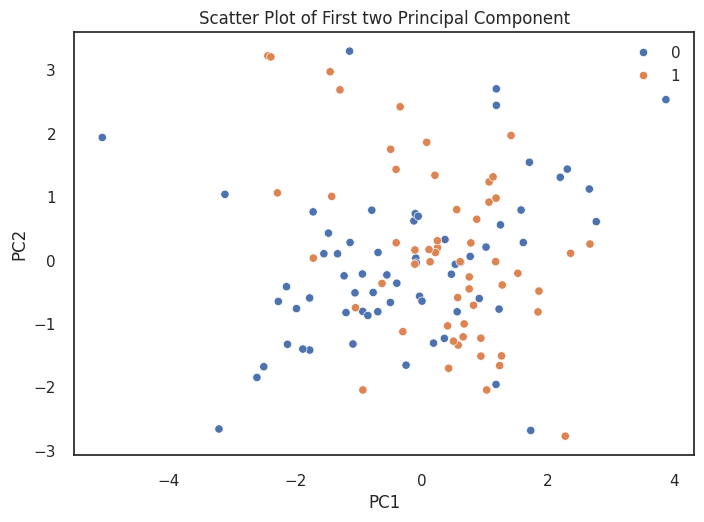

In [29]:
plt.figure()
sns.scatterplot(x=X1[:,0],y=X1[:,1], hue=Y, palette='deep')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First two Principal Component')
plt.show()

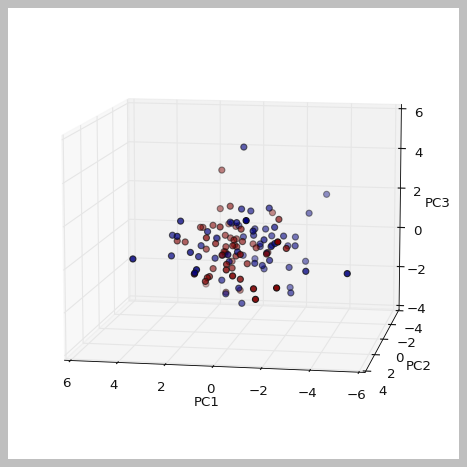

In [30]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('classic')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[:,0],X1[:,1], X1[:,2], c=df_copy.Years, s=30)
ax.view_init(10, 100)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.tight_layout()
plt.show()

In [31]:
X = df_copy.iloc[:, :-1]
Y = df_copy.iloc[:, -1]
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (96, 11)
Shape of X_test: (24, 11)


In [32]:
dum=DummyClassifier(strategy='most_frequent')
dum=dum.fit(X_train,y_train)

score=dum.score(X_test, y_test)
print("Dummy Classifier Accuracy: %.2f%%" % (score * 100.0))

Dummy Classifier Accuracy: 45.83%


Text(0, 0.5, 'Frequency')

<Figure size 560x560 with 0 Axes>

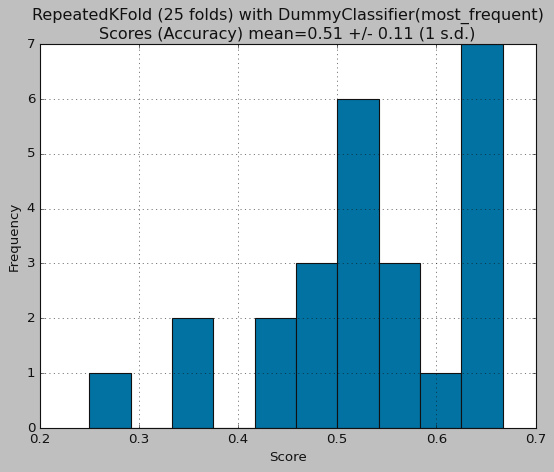

In [34]:
strategy = "most_frequent"

scores = cross_val_score(dum,X, Y,
                cv=RepeatedKFold(n_repeats=CV_N_REPEATS),
                scoring=None)
scores_dummy = scores.copy()

score_line = "Scores (Accuracy) mean={:.2f} +/- {:.2f} (1 s.d.)".format(scores.mean(),scores.std())
plt.figure(figsize=(7,7))
fig, ax = plt.subplots()
pd.Series(scores).hist(ax=ax, bins=BINS)
ax.set_title(f"RepeatedKFold ({len(scores)} folds) with DummyClassifier({strategy})\n" + score_line)
ax.set_xlabel("Score")
ax.set_ylabel("Frequency")

In [35]:
def plot_tree_graph(model,columns,class_names):
    dot_data = export_graphviz(model,feature_names=columns,class_names=class_names)
    graph = graphviz.Source(dot_data)
    return graph

In [36]:
def confusion_mat(y_pred,y_test):
    plt.figure()
    sns.set(font_scale=1.5)
    cm = confusion_matrix(y_pred, y_test)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [39]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

scores = cross_val_score(knn, X, Y, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
print(f"Accuracy mean={scores.mean():.2f} +/- {scores.std():.2f} (1 s.d.)")

Accuracy mean=0.57 +/- 0.08 (1 s.d.)


In [40]:
dt=DecisionTreeClassifier(random_state=1, max_depth=2)
dt=dt.fit(X_train,y_train)
dt_scores = cross_val_score(dt, X, Y, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
print(f"Accuracy mean={dt_scores.mean():.2f} +/- {dt_scores.std():.2f} (1 s.d.)")

Accuracy mean=0.73 +/- 0.07 (1 s.d.)


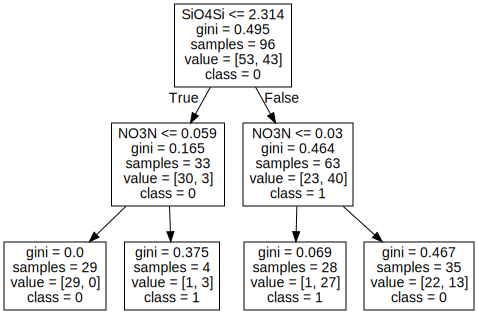

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure()
graph=plot_tree_graph(dt,X.columns,class_names=['0','1'])
graph

In [42]:
bag=BaggingClassifier(n_estimators=100,oob_score=True)
bag=bag.fit(X_train,y_train)

bag_scores = cross_val_score(bag, X, Y, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
print(f"Accuracy mean={bag_scores.mean():.2f} +/- {bag_scores.std():.2f} (1 s.d.)")
print(f"Out of bag score: {bag.oob_score_*100:.2f}")

Accuracy mean=0.79 +/- 0.08 (1 s.d.)
Out of bag score: 78.12


Accuracy of Random Forest Classifier: 87.50


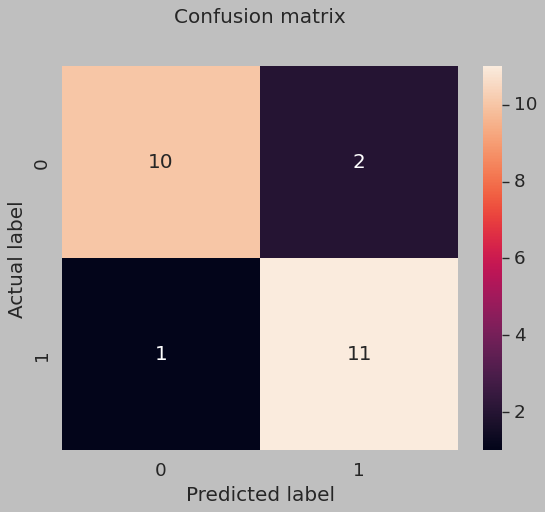

In [44]:
num_estimators = 100
rf = RandomForestClassifier(n_estimators=num_estimators)
rf.fit(X_train, y_train)

rf_score =rf.score(X_test, y_test)
print(f"Accuracy of Random Forest Classifier: {rf_score * 100:.2f}")

y_pred = rf.predict(X_test)
confusion_mat(y_pred, y_test)

In [45]:
feature_names=X_train.columns.values
show_weights(rf,feature_names=feature_names)

Weight,Feature
0.2121 ± 0.3311,SiO4Si
0.1117 ± 0.2068,DINtoDIP
0.1072 ± 0.2028,NH4N
0.0969 ± 0.1656,NO3N
0.0882 ± 0.1599,PP
0.0757 ± 0.1666,SRP
0.0679 ± 0.1513,DOP
0.0651 ± 0.1483,Fe
0.0649 ± 0.1425,DON
0.0588 ± 0.1593,TN/TP


Scores mean=0.81 +/- 0.10 (1 s.d.)


Text(0, 0.5, 'Frequency')

<Figure size 640x480 with 0 Axes>

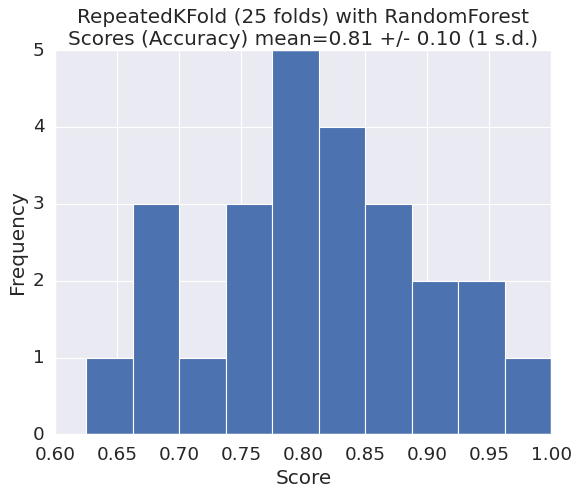

In [47]:
scores = cross_val_score(rf, X, Y, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
scores_est = scores.copy()
print(f"Scores mean={scores.mean():.2f} +/- {scores.std():.2f} (1 s.d.)")

score_line = f"Scores (Accuracy) mean={scores.mean():.2f} +/- {scores.std():.2f} (1 s.d.)"
plt.figure()
fig, ax = plt.subplots()
pd.Series(scores).hist(ax=ax, bins=BINS)
ax.set_title(f"RepeatedKFold ({len(scores)} folds) with RandomForest\n" + score_line)
ax.set_xlabel("Score")
ax.set_ylabel("Frequency")

Text(0.5, 1.0, 'Dummy vs RandomForest Scores')

<Figure size 640x480 with 0 Axes>

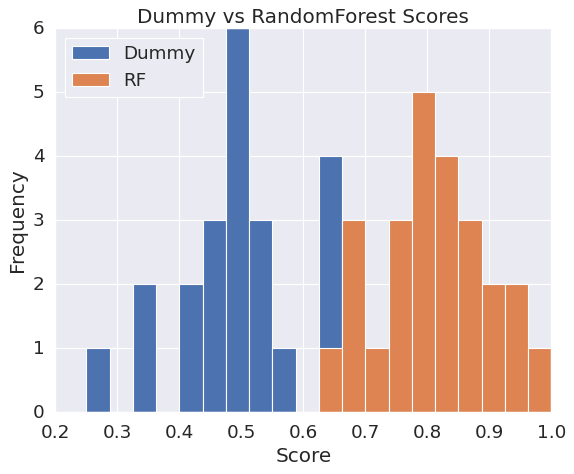

In [48]:
plt.figure()
fig, ax = plt.subplots()
df_dummy_est_scores = pd.DataFrame({'Dummy': scores_dummy, 'RF': scores_est})
df_dummy_est_scores.plot(kind='hist', ax=ax, bins=20)
ax.set_xlabel('Score')
ax.set_title('Dummy vs RandomForest Scores')

Text(0, 0.5, 'Deviance')

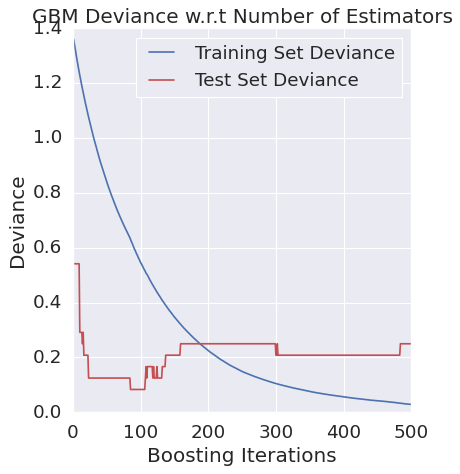

In [54]:
from sklearn.metrics import mean_squared_error
params = {'n_estimators': 500, 'learning_rate': 0.01, 'max_depth': 4, 'loss': 'log_loss'}
gbm = GradientBoostingClassifier(**params)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=500)

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbm.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('GBM Deviance w.r.t Number of Estimators')
plt.plot(np.arange(params['n_estimators']) + 1, gbm.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='best')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

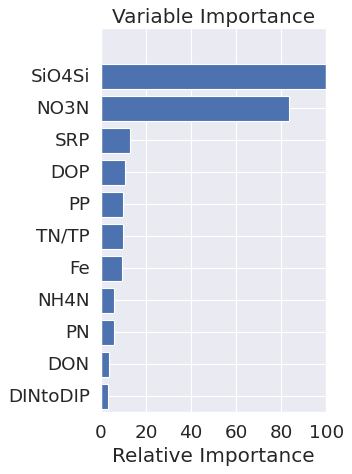

In [55]:
feature_importance = gbm.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [56]:
from xgboost import XGBClassifier, plot_importance,to_graphviz

param = {'max_depth': 3, 'eta': 0.8, 'subsample': 1, 'objective': 'binary:logistic'}
xgb = XGBClassifier(**param)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.8, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Accuracy of XGB Classifier: 75.00


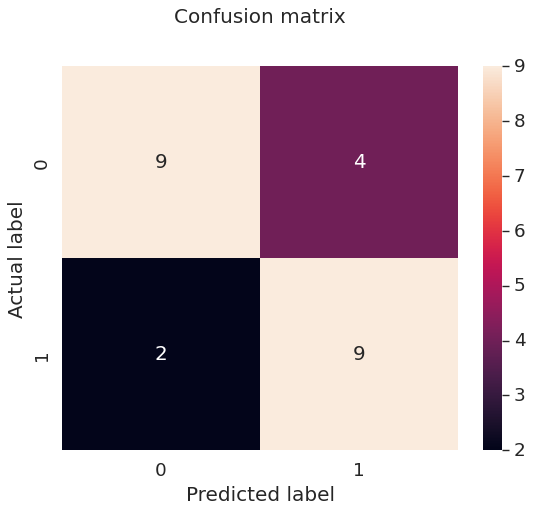

In [57]:
y_pred = xgb.predict(X_test)

xgb_score = accuracy_score(y_test, y_pred)
print(f"Accuracy of XGB Classifier: {xgb_score * 100:.2f}")

confusion_mat(y_pred, y_test)

<Figure size 640x480 with 0 Axes>

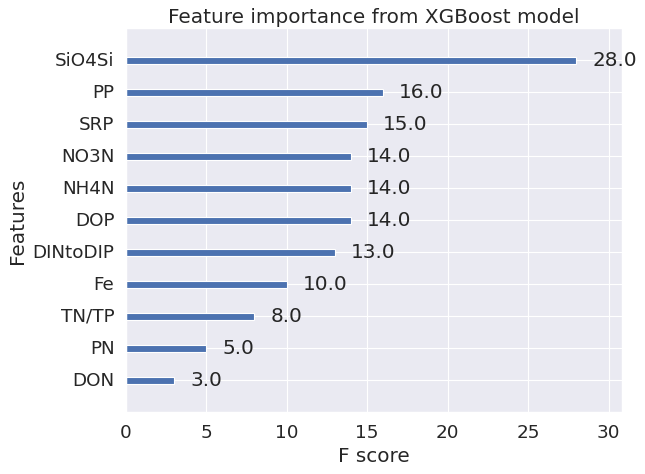

In [58]:
plt.figure()
plot_importance(xgb,title="Feature importance from XGBoost model")
plt.show()

The ensembled model with all the 3 classifiers is: 0.7916666666666666


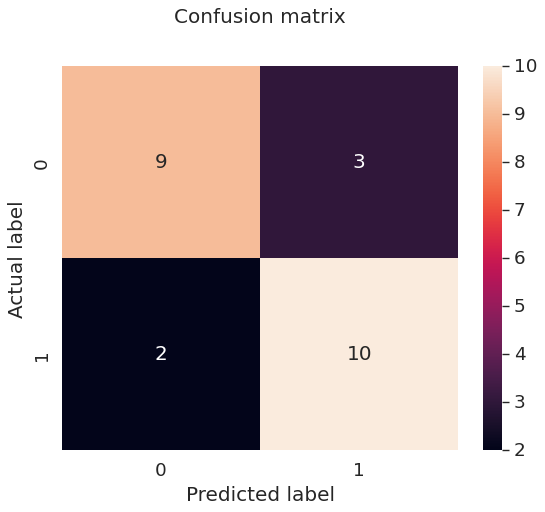

In [59]:
from sklearn.ensemble import VotingClassifier

ensemble_knn_rf_xgb=VotingClassifier(estimators=[('KNN', knn), ('Random Forest', rf),('XGBoost',xgb)], voting='hard')
ensemble_knn_rf_xgb.fit(X_train,y_train)

print('The ensembled model with all the 3 classifiers is:',ensemble_knn_rf_xgb.score(X_test,y_test))

y_pred = ensemble_knn_rf_xgb.predict(X_test)
confusion_mat(y_pred, y_test)

In [60]:
%pip install mlxtend

In [63]:
from sklearn.ensemble import StackingClassifier

sclf = StackingClassifier(estimators=[('knn', knn), ('rf', rf), ('xgb', xgb), ('gbm', gbm)],
                         final_estimator=rf,
                         cv=5)

print('10-fold cross validation:\n')

for clf, label in zip([knn, rf, xgb, gbm, sclf],
                     ['KNearest Neighbors',
                      'Random Forest',
                      'XGB','GBM',
                      'StackingClassifier']):

    sclf_scores = model_selection.cross_val_score(clf, X, Y,
                                                 cv=10, scoring='accuracy')
    print(f"Accuracy: {sclf_scores.mean():.2f} (+/- {sclf_scores.std():.2f}) [{label}]")

10-fold cross validation:

Accuracy: 0.55 (+/- 0.15) [KNearest Neighbors]
Accuracy: 0.78 (+/- 0.16) [Random Forest]
Accuracy: 0.77 (+/- 0.17) [XGB]
Accuracy: 0.73 (+/- 0.14) [GBM]
Accuracy: 0.72 (+/- 0.14) [StackingClassifier]


In [64]:
models = []
models.append(('KNN', knn))
models.append(('DT', dt))
models.append(('RF', rf))
models.append(('GBM', gbm))
models.append(('XGB', xgb))
models.append(('Voting',ensemble_knn_rf_xgb))

In [66]:
results = []
names = []

for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

results.append(np.asarray(sclf_scores))
names.append('Stacking')

KNN: 0.5583333333333333 (0.10573814617041266)
DT: 0.6916666666666667 (0.09895285072531597)
RF: 0.8 (0.13017082793177756)
GBM: 0.7083333333333334 (0.13043729868748774)
XGB: 0.7833333333333333 (0.1130388330520878)
Voting: 0.8083333333333332 (0.11211353372561425)


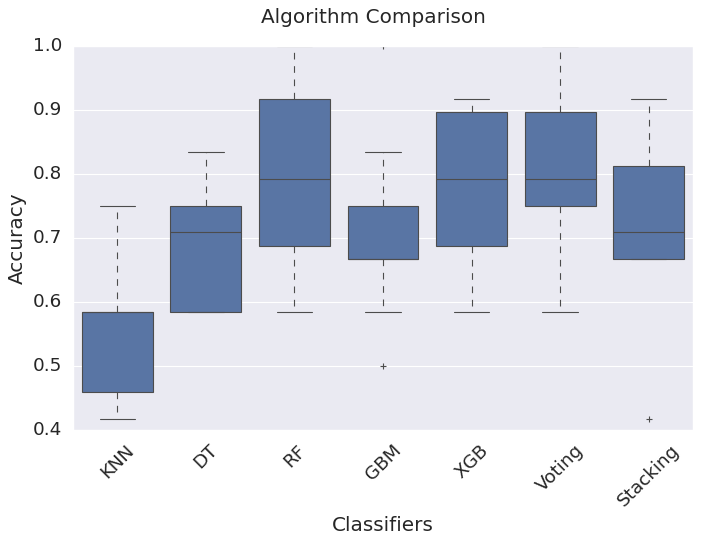

In [70]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison')

results_df = pd.DataFrame()
for i, name in enumerate(names):
    temp_df = pd.DataFrame({'Classifier': [name] * len(results[i]),
                           'Accuracy': results[i]})
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

ax = sns.boxplot(data=results_df, x='Classifier', y='Accuracy')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

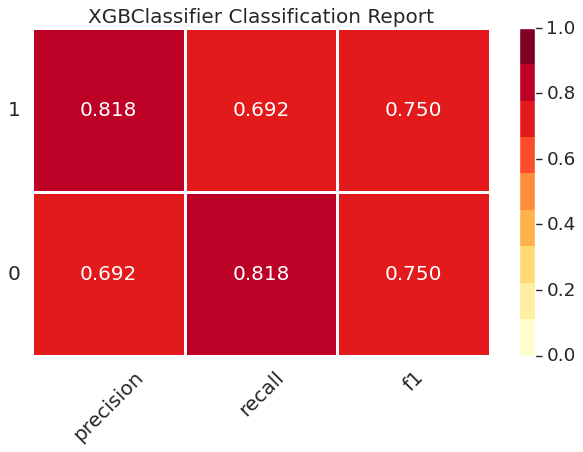

<Axes: title={'center': 'XGBClassifier Classification Report'}>

In [71]:
visualizer = ClassificationReport(xgb,classes=['0','1'])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

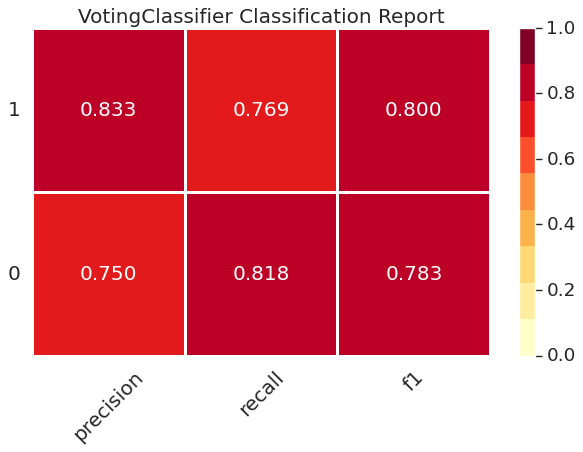

<Axes: title={'center': 'VotingClassifier Classification Report'}>

In [72]:
visualizer = ClassificationReport(ensemble_knn_rf_xgb,classes=['0','1'])

visualizer.score(X_test, y_test)
visualizer.show()